In [27]:
#MOUNT DRIVE
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
#IMPORT LIBRARIES
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

In [29]:
#IMPORT DATASET
df = pd.read_csv("/content/drive/MyDrive/05 - WEEK 5/sales_predictions ORIGINAL.csv")
display( df.head() )
print()
display( df.describe(include='number') )
print()
display( df.info() )

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


None

#INSPECTING AND CLEANING DATA



In [30]:
df_backup = df.copy()   #Making backup copy of original untouched dataframe.
df.duplicated().sum()   #Checking the total number of duplicated rows of data.

0

In [31]:
#Need to explore values of all columns.
for x in df.columns:
  print( f"{x} COLUMN" )
  print( df[x].value_counts() )
  print()

Item_Identifier COLUMN
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

Item_Weight COLUMN
12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64

Item_Fat_Content COLUMN
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Item_Visibility COLUMN
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64

Item_Type COLUMN
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    6

<ipython-input-32-8323cb91de3f>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  my_graph = sns.heatmap(df.corr(), cmap="Reds", annot=True);


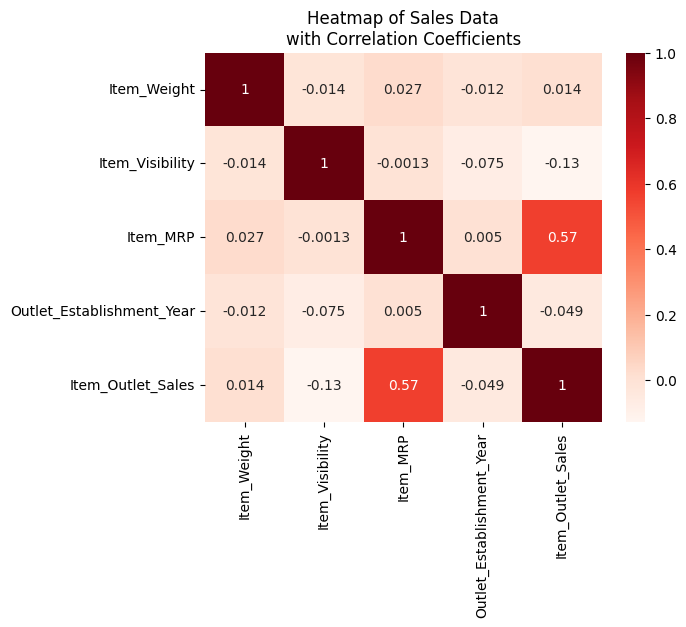

In [32]:
#Finding the correlation of all data in the imported dataframe.
import seaborn as sns
my_graph = sns.heatmap(df.corr(), cmap="Reds", annot=True);
my_graph.set(title = "Heatmap of Sales Data\nwith Correlation Coefficients");

The correlation heat map above only shows a single feature "Item_MRP" with a reasonibly high correlation to the target column of 'Item_Outlet_Sales".

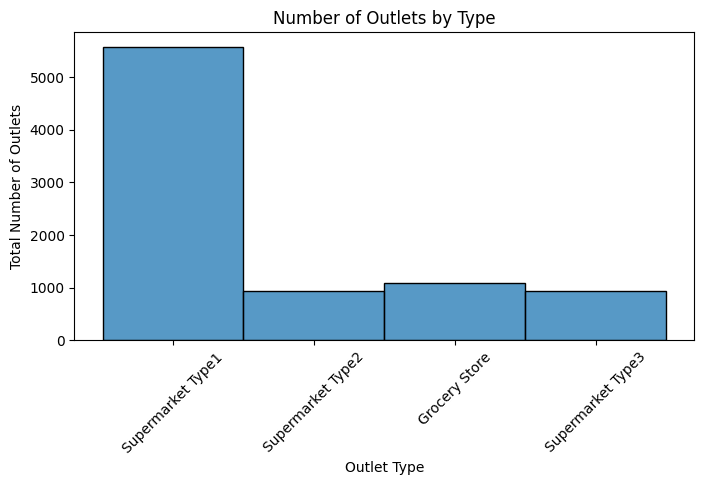

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

fig,ax = plt.subplots(figsize=(8,4));
sns.histplot(data=df, x="Outlet_Type", ax = ax);
plt.xticks(rotation=45);
plt.title("Number of Outlets by Type")
plt.xlabel("Outlet Type");
plt.ylabel("Total Number of Outlets");

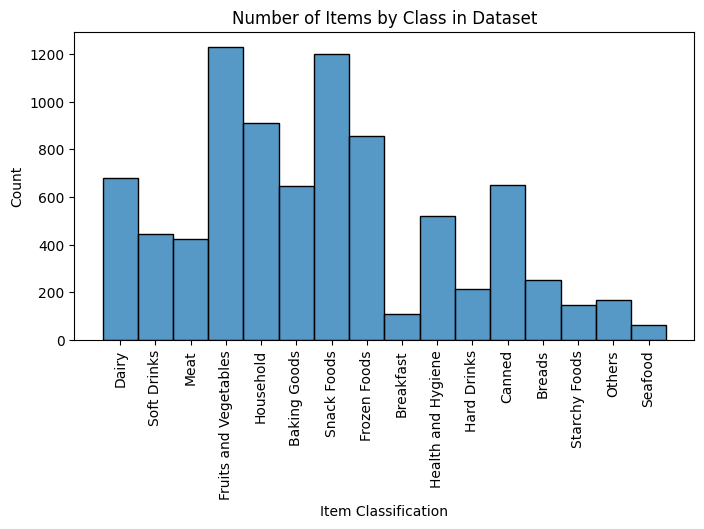

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

fig,ax = plt.subplots(figsize=(8,4));
sns.histplot(data=df, x="Item_Type", ax = ax);
plt.xticks(rotation=90);
plt.title("Number of Items by Class in Dataset")
plt.xlabel("Item Classification");
plt.ylabel("Count");

In [35]:
#Column "Item_Fat_Content" has labels that need to be relabled.
display( df["Item_Fat_Content"].value_counts() )
print()

df["Item_Fat_Content"].replace(["LF","low fat"],"Low Fat",inplace=True)
df["Item_Fat_Content"].replace("reg","Regular",inplace=True)

display( df["Item_Fat_Content"].value_counts() )   #Confirming modifications.

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [36]:
#"Outlet_Size" catagory should be changed from "High" to "Large"
display( df["Outlet_Size"].value_counts() )
print()

#Replacing "High" with "Large" in column "Outlet_Size"
df["Outlet_Size"].replace("High","Large",inplace=True)
print()
df["Outlet_Size"].value_counts()   #Confirming modification.

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Medium    2793
Small     2388
Large      932
Name: Outlet_Size, dtype: int64

#Define features (X) and target (y), then perform Train\Test Split of data.

In [37]:
y = df["Item_Outlet_Sales"]   #Target column that we want to predict.
X = df.drop(["Item_Outlet_Sales", "Item_Identifier"], axis=1)   #Feature data used to train ML.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=23)

In [38]:
display( X_train.head() )
X_train.info()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
625,7.475,Low Fat,0.148493,Fruits and Vegetables,240.6854,OUT035,2004,Small,Tier 2,Supermarket Type1
8175,NaN,Regular,0.016979,Baking Goods,177.0370,OUT027,1985,Medium,Tier 3,Supermarket Type3
3610,8.365,Regular,0.040070,Fruits and Vegetables,190.7188,OUT017,2007,NaN,Tier 2,Supermarket Type1
2045,5.260,Regular,0.042009,Baking Goods,162.6868,OUT017,2007,NaN,Tier 2,Supermarket Type1
2363,11.650,Low Fat,0.040744,Fruits and Vegetables,185.9240,OUT017,2007,NaN,Tier 2,Supermarket Type1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6392 entries, 625 to 6175
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                5300 non-null   float64
 1   Item_Fat_Content           6392 non-null   object 
 2   Item_Visibility            6392 non-null   float64
 3   Item_Type                  6392 non-null   object 
 4   Item_MRP                   6392 non-null   float64
 5   Outlet_Identifier          6392 non-null   object 
 6   Outlet_Establishment_Year  6392 non-null   int64  
 7   Outlet_Size                4561 non-null   object 
 8   Outlet_Location_Type       6392 non-null   object 
 9   Outlet_Type                6392 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 549.3+ KB


* Need to impute "Item_Weight" as number to mean
* Need to impute "Outlet_Size" as object to most_frequent

#Creating column transfomers and pipelines to prepare dataset for Machine Learning.

In [39]:
#instantiate the selectors to for numeric and categorical data types
num_selector = make_column_selector(dtype_include="number")
cat_selector = make_column_selector(dtype_include="object")

#instantiate SimpleImputers with most_frequent and median strategies
freq_imputer = SimpleImputer(strategy="most_frequent")
mean_imputer = SimpleImputer(strategy="mean")

#Instantiate Scaler
scaler = StandardScaler()

#Instantiate One-hot encoder
ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

#Instantiate Numeric pipeline
numeric_pipe = make_pipeline(mean_imputer, scaler)

# Categorical pipeline
categorical_pipe = make_pipeline(freq_imputer, ohe)

# create tuples of (imputer, selector) for each datatype
num_tuple = (numeric_pipe, num_selector)
cat_tuple = (categorical_pipe, cat_selector)
# instantiate ColumnTransformer
preprocessor = make_column_transformer(num_tuple, cat_tuple, remainder="passthrough")
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fcc04fd0730>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fcc04fd00d0>)])

In [40]:
# fit on train
preprocessor.fit(X_train)   #Learn (fit) from training data.

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fcc04fd0730>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7fcc04fd00d0>)])

In [41]:
# transform train and test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [42]:
# Check for missing values and that data is scaled and one-hot encoded
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
X_train_processed

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (6392, 42)




array([[-1.27451691e+00,  1.58033995e+00,  1.58693207e+00, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 4.21835896e-16, -9.50855374e-01,  5.68333387e-01, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [-1.06316639e+00, -5.06439778e-01,  7.87290397e-01, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 4.21835896e-16, -7.67980368e-01, -8.62656894e-01, ...,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 1.58108987e+00, -9.74528530e-01,  6.51932594e-01, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.06554111e+00,  2.35265268e+00,  7.87023778e-02, ...,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [43]:
X_train_processed = pd.DataFrame(X_train_processed)

In [44]:
X_train_processed

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,-1.274517e+00,1.580340,1.586932,0.734920,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,4.218359e-16,-0.950855,0.568333,-1.536592,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,-1.063166e+00,-0.506440,0.787290,1.093579,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,-1.800518e+00,-0.469123,0.338680,1.093579,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,-2.830692e-01,-0.493463,0.710557,1.093579,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,1.664205e+00,-0.605125,-1.273954,0.017600,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
6388,4.218359e-16,0.001482,0.683434,-1.536592,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6389,4.218359e-16,-0.767980,-0.862657,-1.536592,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6390,1.581090e+00,-0.974529,0.651933,0.137153,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


#**ELASTIC NET Linear Regression Model**

In [45]:
from sklearn.linear_model import ElasticNet
## Create an instance of the model
en_reg = ElasticNet(random_state=23)
## Create a model pipeline
en_reg_pipe = make_pipeline(preprocessor, en_reg)
## Fit the model
en_reg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fcc04fd0730>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fcc04fd00d0>)])),
                ('elasticnet', ElasticNet(random_state=23))])

In [46]:
en_reg.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'positive': False,
 'precompute': False,
 'random_state': 23,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

##ELASTIC NET Linear Regression Performance Evaluation

In [47]:
enet_train_predicted = en_reg_pipe.predict(X_train)
enet_test_predicted = en_reg_pipe.predict(X_test)

from sklearn.metrics import r2_score
ENET_PERF_train_R2 = r2_score(y_train, enet_train_predicted)   #R2 Score to compare y_train
ENET_PERF_test_R2 = r2_score(y_test, enet_test_predicted)   #R2 Score to compare y_test

print(f'ELASTIC NET Linear Regression - (R2 Metrics on y_train):  {(ENET_PERF_train_R2.round(5))*100}%')
print(f'ELASTIC NET Linear Regression - (R2 Metrics on y_test):  {(ENET_PERF_test_R2.round(5))*100}%')

ELASTIC NET Linear Regression - (R2 Metrics on y_train):  41.502%
ELASTIC NET Linear Regression - (R2 Metrics on y_test):  42.436%


In [49]:
en_reg.get_params()

{'alpha': 1000,
 'copy_X': True,
 'fit_intercept': True,
 'l1_ratio': 0.95,
 'max_iter': 5000,
 'positive': False,
 'precompute': False,
 'random_state': 23,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

##ELASTIC NET Tuning

In [48]:
alphas = [.0001, .001, .01, .1, 1, 10, 100, 1000]
l1_ratios = np.array(range(5,100,5)) / 100

ind = len(alphas) * len(l1_ratios)
enet_scores = pd.DataFrame(columns=['test r2', 'train r2'],
                      index=range(ind))

counter=0
for alpha in alphas:
  for l1_ratio in l1_ratios:
    en_reg = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, max_iter=5000, random_state=23)
    en_reg_pipe = make_pipeline(preprocessor, en_reg)
    en_reg_pipe.fit(X_train, y_train)

    train_pred = en_reg_pipe.predict(X_train)
    test_pred = en_reg_pipe.predict(X_test)
    
    enet_scores.loc[counter, 'train r2'] = r2_score(y_train, train_pred)
    enet_scores.loc[counter, 'test r2'] = r2_score(y_test, test_pred)
    enet_scores.loc[counter, 'alpha'] = alpha
    enet_scores.loc[counter, 'l1_ratio'] = l1_ratio
    counter += 1
enet_scores.sort_values(by='test r2', ascending=False)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.029e+09, tolerance: 1.852e+06
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.008e+09, tolerance: 1.852e+06
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.001e+09, tolerance: 1.852e+06

,test r2,train r2,alpha,l1_ratio
75,0.568195,0.561493,0.10,0.95
50,0.568142,0.561583,0.01,0.65
49,0.568142,0.561561,0.01,0.60
51,0.568139,0.561603,0.01,0.70
48,0.568138,0.561535,0.01,0.55
...,...,...,...,...
147,0.000546,0.000539,1000.00,0.75
148,0.000515,0.000509,1000.00,0.80
149,0.000465,0.00046,1000.00,0.85
150,0.000364,0.000361,1000.00,0.90


In [50]:
#Applying tuned parameters.
en_reg = ElasticNet(alpha=0.10, l1_ratio=0.95, random_state=23)
en_reg_pipe = make_pipeline(preprocessor, en_reg)
en_reg_pipe.fit(X_train, y_train)

enet_tuned_train_pred = en_reg_pipe.predict(X_train)
enet_tuned_test_pred = en_reg_pipe.predict(X_test)

In [51]:
ENET_PERF_train_R2_TUNED = r2_score(y_train, enet_tuned_train_pred)   #R2 Score to compare y_train
ENET_PERF_test_R2_TUNED = r2_score(y_test, enet_tuned_test_pred)   #R2 Score to compare y_test

print(f'ELASTIC NET TUNED Linear Regression - (R2 Metrics on y_train):  {(ENET_PERF_train_R2_TUNED.round(5))*100}%')
print(f'ELASTIC NET TUNED Linear Regression - (R2 Metrics on y_test):  {(ENET_PERF_test_R2_TUNED.round(5))*100}%')

ELASTIC NET TUNED Linear Regression - (R2 Metrics on y_train):  56.149%
ELASTIC NET TUNED Linear Regression - (R2 Metrics on y_test):  56.82000000000001%


##ELASTIC NET - Root Mean Squared Error (RMSE)

In [52]:
#Calculating RMSE using NumPy based on predictions from tuned model.
enet_NP_train_RMSE = np.sqrt(np.mean( np.abs(enet_tuned_train_pred - y_train)**2 ))
enet_NP_test_RMSE = np.sqrt(np.mean( np.abs(enet_tuned_test_pred - y_test)**2 ))

print(f"ELASTIC NET TUNED Model Training RMSE:  {enet_NP_train_RMSE}")
print(f"ELASTIC NET TUNED Model Testing RMSE:  {enet_NP_test_RMSE}")

ELASTIC NET TUNED Model Training RMSE:  1127.2378953636644
ELASTIC NET TUNED Model Testing RMSE:  1129.4128638494615


#**Decision Tree Regression Model**

In [53]:
from sklearn.tree import DecisionTreeRegressor
dec_tree = DecisionTreeRegressor(random_state=23)
dec_tree_pipe = make_pipeline(preprocessor, dec_tree)
dec_tree_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fcc04fd0730>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fcc04fd00d0>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=23))])

In [54]:
dec_tree.max_depth

##Decision Tree Performance Evaluation

In [55]:
dt_train_predicted = dec_tree_pipe.predict(X_train)
dt_test_predicted = dec_tree_pipe.predict(X_test)

print(f'Decision Tree - (R2 Metrics on y_train):  {(r2_score(y_train, dt_train_predicted)).round(5)}')
print(f'Decision Tree - (R2 Metrics on y_train):  {(r2_score(y_test, dt_test_predicted)).round(5)}')

Decision Tree - (R2 Metrics on y_train):  1.0
Decision Tree - (R2 Metrics on y_train):  0.22091


##Decision Tree Tuning

In [56]:
dec_tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 23,
 'splitter': 'best'}

In [57]:
#Tuning for 'max_depth'

depths = list(range(2, 100,1))
# Data frame to store the score for each value of max_depth:
dt_scores = pd.DataFrame(index=depths, columns=['Test Score','Train Score'])
for depth in depths:
    dec_tree = DecisionTreeRegressor(max_depth=depth, random_state=23)
    dec_tree_pipe = make_pipeline(preprocessor,dec_tree)
    dec_tree_pipe.fit(X_train, y_train)

    #enet_tuned_train_pred = dec_tree_pipe.predict(X_train)
    #enet_tuned_test_pred = dec_tree_pipe.predict(X_test)

    dt_train_score = dec_tree_pipe.score(X_train, y_train)
    dt_test_score = dec_tree_pipe.score(X_test, y_test)
    dt_scores.loc[depth, 'Train Score'] = dt_train_score
    dt_scores.loc[depth, 'Test Score'] = dt_test_score

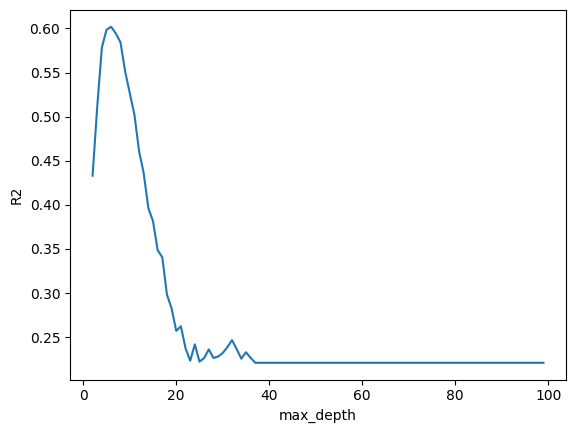

In [58]:
# Visualize which max_depth leads to the highest r2 score
import matplotlib.pyplot as plt
plt.plot(depths, dt_scores['Test Score'])
plt.xlabel('max_depth')
plt.ylabel('R2');

In [59]:
sorted_scores = dt_scores.sort_values(by='Test Score', ascending=False)
sorted_scores.head()

,Test Score,Train Score
6,0.601865,0.613026
5,0.598552,0.603239
7,0.594296,0.626657
8,0.584302,0.641062
4,0.578299,0.585696


In [60]:
#Applying tune parameter.
dec_tree_tuned = DecisionTreeRegressor(max_depth=6, random_state=23)
dec_tree_pipe_tuned = make_pipeline(preprocessor,dec_tree_tuned)
dec_tree_pipe_tuned.fit(X_train, y_train)

dt_train_predicted_tuned = dec_tree_pipe_tuned.predict(X_train)
dt_test_predicted_tuned = dec_tree_pipe_tuned.predict(X_test)

In [61]:
print(f'Decision Tree TUNED - (R2 Metrics on y_train):  {(r2_score(y_train, dt_train_predicted_tuned)).round(5)*100}%')
print(f'Decision Tree TUNED - (R2 Metrics on y_train):  {(r2_score(y_test, dt_test_predicted_tuned)).round(5)*100}%')

Decision Tree TUNED - (R2 Metrics on y_train):  61.303%
Decision Tree TUNED - (R2 Metrics on y_train):  60.18599999999999%


###DECISION TREE - Root Mean Squared Error (RMSE)

In [62]:
#Calculating RMSE using NumPy based on predictions from tuned model.
dt_NP_train_RMSE = np.sqrt(np.mean( np.abs(dt_train_predicted_tuned - y_train)**2 ))
dt_NP_test_RMSE = np.sqrt(np.mean( np.abs(dt_test_predicted_tuned - y_test)**2 ))

print(f"Decision Tree Model Training RMSE:  {dt_NP_train_RMSE}")
print(f"Decision Tree Model Testing RMSE:  {dt_NP_test_RMSE}")

Decision Tree Model Training RMSE:  1058.9329988640336
Decision Tree Model Testing RMSE:  1084.4872016864915


---
---

#Model Recommendation:  Decision Tree

From their individual results of tuned parameters (below), the Decision Tree model has a higher percentage R2 (preferred) on the test data, as well as a lower RMSE (preferred) on the test data.  As of now both models are producing lower than ideal results for R2.  This may be expected because all except one feature in the dataset have very low correlation to based on the plotted heatmap above.

---

ELASTIC NET TUNED Linear Regression - (R2 Metrics on y_train):  56.149%

ELASTIC NET TUNED Linear Regression - (R2 Metrics on y_test):  56.82000000000001%

ELASTIC NET TUNED Model Training RMSE:  1127.2378953636644

ELASTIC NET TUNED Model Testing RMSE:  1129.4128638494615

---

Decision Tree TUNED - (R2 Metrics on y_train):  61.303%

Decision Tree TUNED - (R2 Metrics on y_train):  60.18599999999999%

Decision Tree Model Training RMSE:  1058.9329988640336

Decision Tree Model Testing RMSE:  1084.4872016864915

---